# Community

## Community discovery

In [44]:
!pip install --user graphtools

In [2]:
from scipy.optimize import curve_fit
from sklearn import preprocessing
from cdlib import algorithms
import itertools
from cdlib import evaluation
from collections import Counter
from cdlib import NodeClustering
from networkx.generators.community import LFR_benchmark_graph
from cdlib import viz

import random
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cdlib

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'wurlitzer'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [3]:
#Import the newtwork from the edgelist and the words ranking

rank = pd.read_csv('words_ranking.csv')
G =nx.read_edgelist("word1_dict.edgelist")
# G=nx.convert_node_labels_to_integers(G)  #NB: the communities change if use integers as labels

In [4]:
rank=rank.set_index('Word')

# Community Discovery algorithm(s) selection and configuration (to top)
After having defined the graph, we can select the algorithm(s) to partition it.

### Preliminar analysis

In [5]:
#Preliminar analysis of node coverage as min_size varies

a=[]
b=[]
c=[]
e=G.number_of_nodes()
alg_coms = algorithms.leiden(G)
data1=pd.DataFrame()
data1['size_comm']=alg_coms.size(summary=False)
for i in range(1,900):
    a.append(i)
    b.append(len(data1[data1['size_comm']>i]))
    d=data1[data1['size_comm']>i].sum()
    f=d[0]/e
    c.append(f)
    

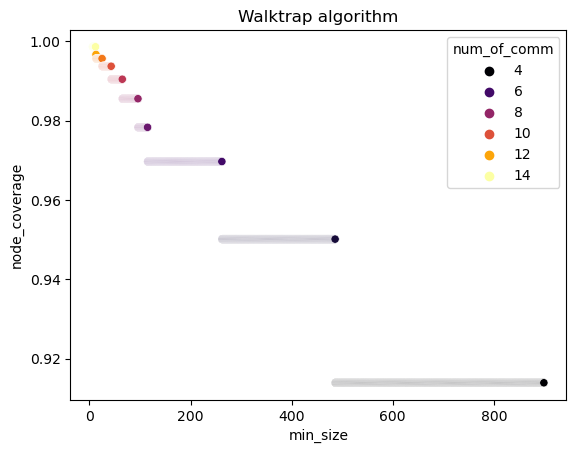

In [6]:
data2=pd.DataFrame()
data2['min_size']=a
data2['node_coverage']=c
data2['num_of_comm']=b
data2=data2[data2['min_size']>6]
sns.scatterplot(data=data2, x='min_size', y='node_coverage', hue='num_of_comm',legend='brief', palette='inferno').set_title('Walktrap algorithm')
# plt.savefig('walk_part.png')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

### Run the algorithms

In [7]:
leiden_coms = algorithms.leiden(G)

In [8]:
import networkx.algorithms.community as nx_comm
from cdlib import evaluation
nx_comm.modularity(G, leiden_coms.communities)

0.15847746595588455

# Leiden

In [9]:
len(leiden_coms.communities),leiden_coms.overlap, leiden_coms.node_coverage

(16, False, 1.0)

### Clustering Evaluation (Fitness functions) (to top)
After having obtained a network clustering we can compute several indexes upon it.

In [12]:
leiden_coms.average_internal_degree()

FitnessResult(min=1.0, max=101.93652501344809, score=12.751478070861678, std=23.525988686716264)

In [10]:
leiden_coms.average_internal_degree(summary=False)

[14.17304546941446,
 10.14354579539368,
 101.93652501344809,
 14.9796421961752,
 13.430499325236168,
 9.229571984435797,
 7.7,
 7.402298850574713,
 11.058823529411764,
 3.6363636363636362,
 3.0,
 3.0,
 1.3333333333333333,
 1.0,
 1.0,
 1.0]

In [11]:
evaluation.average_internal_degree(G, leiden_coms)

FitnessResult(min=1.0, max=101.93652501344809, score=12.751478070861678, std=23.525988686716264)

### Community/Statistics Visualization (to top)
CDlib allows to generate two families of predefined plots:
network/community visualizations community fitness/comparison visualizations

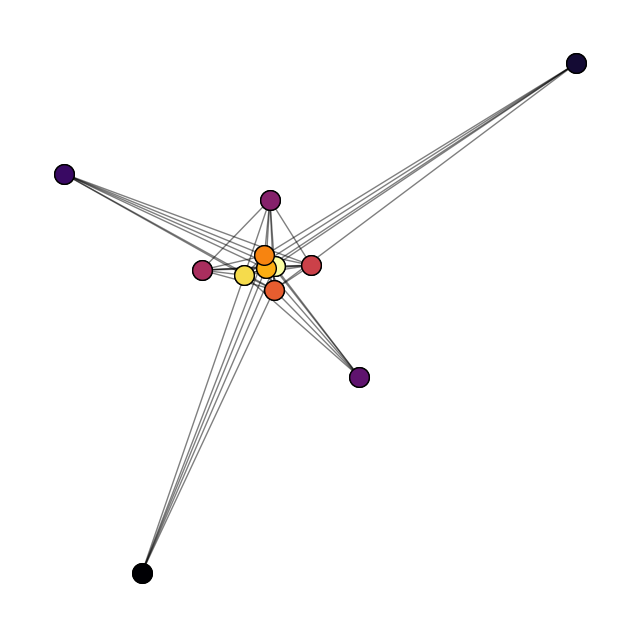

In [22]:
viz.plot_community_graph(G, leiden_coms, figsize=(8, 8), top_k=12 ,cmap='inferno_r')

 ## Intra and Inter communities words 

In [15]:
#Intra-Communities words
for j in range(0, len(leiden_coms.communities)):
    l=[]
    if ((j>0)&(len(leiden_coms.communities[j])>50)):                      #select the min size of the current comm
        for k in range(0, len(leiden_coms.communities)):
            if (k!=j)&(len(leiden_coms.communities[k])>50):
                for m in leiden_coms.communities[k]:
                    for n in leiden_coms.communities[j]:
                        if G.has_edge(m,n):
                            l.append(m)
                            l.append(n)                            
                        else:pass
                dt=pd.DataFrame()
                dt['word']=l
                print(f"Intra-communities {j}-{k}")
                print(dt['word'].value_counts().nlargest(30))

Intra-communities 1-0
europa     903
anni       799
dopo       655
azione     641
italia     621
conte      616
prima      537
ancora     527
già        524
solo       460
due        440
lega       435
poi        410
fatto      389
molto      382
calenda    381
meloni     378
letta      348
renzi      327
fare       302
bonino     295
cosa       277
salvini    271
quando     257
senza      254
essere     248
mai        248
sempre     238
stato      230
così       205
Name: word, dtype: int64
Intra-communities 1-2
europa     1834
anni       1689
azione     1534
dopo       1512
italia     1508
prima      1364
ancora     1350
già        1331
due        1160
molto      1136
conte       616
roma        487
solo        460
lega        435
poi         410
fatto       389
anno        385
calenda     381
meloni      378
deuropa     356
letta       348
squadra     327
renzi       327
fare        302
bonino      295
cosa        277
gol         271
salvini     271
vinto       267
quando      257
N

Intra-communities 3-2
parte       1453
altri       1430
paese       1244
italiani    1154
vuole       1123
putin        835
leuropa      800
russia       791
soldi        775
guerra       712
stati        665
europa       631
conte        630
gas          611
meloni       562
lega         553
usa          548
letta        506
solo         501
milioni      485
salvini      473
calenda      453
euro         438
fatto        431
renzi        425
nato         420
sanzioni     412
poi          394
draghi       394
bonino       381
Name: word, dtype: int64
Intra-communities 3-4
altri       1630
parte       1623
paese       1361
italiani    1282
vuole       1251
putin        914
soldi        856
russia       856
leuropa      854
guerra       773
stati        725
gas          668
europa       631
conte        630
usa          595
meloni       562
lega         553
milioni      537
letta        506
solo         501
euro         479
salvini      473
nato         457
calenda      453
sanzioni     

Intra-communities 5-0
conte       126
meloni       90
bonino       83
voto         82
lega         80
calenda      78
letta        78
fatto        76
solo         71
renzi        69
nuova        61
salvini      61
essere       59
destra       58
poi          57
cosa         55
promesse     55
stato        50
fare         50
ora          49
governo      47
draghi       45
senza        44
mafia        43
così         43
sempre       43
stupro       42
sinistra     41
colpo        41
città        40
Name: word, dtype: int64
Intra-communities 5-1
conte          126
meloni          90
nuova           85
bonino          83
voto            82
lega            80
calenda         78
letta           78
fatto           76
solo            71
renzi           69
città           67
promesse        66
europa          65
salvini         61
colpo           59
essere          59
destra          58
poi             57
cosa            55
mafia           54
decreto         53
anni            51
legislatura   

Intra-communities 7-0
stasera         52
dovrà           42
evitare         40
calenda         40
intanto         39
giustizia       39
termine         38
chiaramente     37
interessante    36
pieno           35
letta           35
conte           32
meloni          31
obbligo         29
bonino          29
solo            29
possibili       29
cosa            28
fatto           27
renzi           27
lega            27
vaccinale       27
voto            25
meeting         25
mai             23
ragioni         22
allea           22
salvini         22
fare            21
detta           21
Name: word, dtype: int64
Intra-communities 7-1
stasera         76
intanto         57
dovrà           56
evitare         54
termine         52
giustizia       49
pieno           48
interessante    47
chiaramente     46
calenda         40
vaccinale       37
letta           35
obbligo         35
possibili       33
conte           32
meloni          31
arriverà        29
ragioni         29
solo            29


In [16]:
#Inter-Communities words

for j in range(0, len(leiden_coms.communities)):
    df=pd.DataFrame(leiden_coms.communities[j], columns=['word'])
    df['Count']=np.array(rank.loc[leiden_coms.communities[j]]['Count'])
    df=df.sort_values(by=['Count'], ascending=False)
    print(f"Community {j}")
    
    #Choose to print only the N most common 
    print(df.head(30))

Community 0
        word  Count
8     meloni   6832
3      conte   6378
2      letta   6193
0      renzi   5951
1    calenda   5661
13   salvini   5524
30      lega   5338
5     bonino   4670
6       solo   3634
4      fatto   3331
10       poi   2735
14      cosa   2635
9       fare   2624
7    governo   2512
11    draghi   2421
12       mai   2163
20    sempre   2083
17      voto   1990
16     stato   1946
25    essere   1918
15    quando   1907
28      così   1749
24     senza   1722
26   partito   1702
19    destra   1682
18       ora   1587
23  sinistra   1523
27      bene   1502
22    votare   1422
21      voti   1412
Community 1
         word  Count
9      europa   3239
3        anni   2099
2      italia   2088
8      azione   1966
0        dopo   1715
1      ancora   1589
7         già   1563
4       prima   1528
6         due   1195
5       molto   1129
10       roma    537
337   deuropa    480
16       anno    341
756    league    297
14      vinto    280
70    squadra    270

# Qualitative evaluation 

In [17]:
#hub dominance
leiden_hub = evaluation.hub_dominance(G,leiden_coms)
leiden_hub

FitnessResult(min=0.14453125, max=1.0, score=0.6653727339357762, std=0.3346456971919072)

In [18]:
#expansion
leiden_exp = evaluation.expansion(G,leiden_coms)
leiden_exp

FitnessResult(min=0.0, max=82.78859601936524, score=23.47678043886367, std=20.18336704515241)

In [19]:
#Conductance
leiden_cond = evaluation.conductance(G,leiden_coms)
leiden_cond 

FitnessResult(min=0.0, max=0.8263682933405231, score=0.6264864878985317, std=0.2611075795490886)

In [20]:
def community_purity(coms, nth):
    purities = []
    for c in coms.communities:
        houses = []
        for node in c:
            if node in nth:
                houses.extend(nth[node])
        
        cnt = Counter(houses)
        purity = max(cnt.values())/sum(cnt.values())
        purities.append(purity)
    return purities

In [21]:
leiden_purities = community_purity(leiden_coms, G)
leiden_purities

[0.012872130954829988,
 0.01055089984888034,
 0.0032381684546481694,
 0.007306031238783332,
 0.008109963669651285,
 0.011601141699659331,
 0.010429201764941836,
 0.010784578053383662,
 0.023622047244094488,
 0.054945054945054944,
 0.06451612903225806,
 0.06557377049180328,
 0.09523809523809523,
 0.25,
 0.5,
 0.5]